In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

# Importing Data & Cleaning

In [2]:
#use skiprows parameter to ignore the very first row that has unwanted headers
df = pd.read_csv('CreditOne_Data.csv', skiprows=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30001 non-null  object 
 2   SEX                         30001 non-null  object 
 3   EDUCATION                   30001 non-null  object 
 4   MARRIAGE                    30001 non-null  object 
 5   AGE                         30001 non-null  object 
 6   PAY_0                       30001 non-null  object 
 7   PAY_2                       30001 non-null  object 
 8   PAY_3                       30001 non-null  object 
 9   PAY_4                       30001 non-null  object 
 10  PAY_5                       30001 non-null  object 
 11  PAY_6                       30001 non-null  object 
 12  BILL_AMT1                   30001 non-null  object 
 13  BILL_AMT2                   300

In [5]:
df = df.drop_duplicates()

In [6]:
#Checking values with NaN
df.isna().sum()

ID                            1
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
#trying out changing one variable to numberical
df['AGE'].astype(int)

ValueError: invalid literal for int() with base 10: 'X5'

Seems that there is another row with "X5" value. 
After running a find function, the problematic row is #204 on the csv file but index #201 on the df (after dropping the first row)

In [8]:
print(df.loc[[201]])

     ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
201 NaN        X1  X2        X3       X4  X5    X6    X7    X8    X9  ...   

    BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
201       X15       X16       X17      X18      X19      X20      X21   

    PAY_AMT5 PAY_AMT6 default payment next month  
201      X22      X23                          Y  

[1 rows x 25 columns]


In [9]:
#dropping the problematic row
df = df.drop(201,axis=0)
print(df.iloc[200:205])

        ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3  \
200  201.0    180000  female  graduate school        1  38    -2    -2    -2   
202  202.0    140000    male  graduate school        2  31     0     0     2   
203  203.0    140000  female  graduate school        2  26    -1     0    -1   
204  204.0    120000    male       university        2  26     0     0     0   
205  205.0    360000  female       university        1  48     0     0     0   

    PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
200    -2  ...         0         0         0        0        0        0   
202     0  ...     20225     27407     10833    25000        0     3000   
203    -1  ...      5818     13506       487    10000    13001     5841   
204     0  ...    116000    119131    122135     5000     5000     4152   
205     0  ...    190211    173557    146511     9100     7300     5800   

    PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
200     

In [10]:
#Changing data types to numerical where applicable
# using dictionary to convert specific columns
convert_dict = {'LIMIT_BAL': int, 'MARRIAGE': int, 'AGE': int, 
                'PAY_0': int, 'PAY_2': int,'PAY_3': int,'PAY_4': int,'PAY_5': int,'PAY_6': int,
                'BILL_AMT1': int, 'BILL_AMT2': int, 'BILL_AMT3': int, 'BILL_AMT4': int, 'BILL_AMT5': int, 'BILL_AMT6': int,
                'PAY_AMT1': int, 'PAY_AMT2': int, 'PAY_AMT3': int, 'PAY_AMT4': int, 'PAY_AMT5': int, 'PAY_AMT6': int}
df = df.astype(convert_dict)
print(df.dtypes)

ID                            float64
LIMIT_BAL                       int32
SEX                            object
EDUCATION                      object
MARRIAGE                        int32
AGE                             int32
PAY_0                           int32
PAY_2                           int32
PAY_3                           int32
PAY_4                           int32
PAY_5                           int32
PAY_6                           int32
BILL_AMT1                       int32
BILL_AMT2                       int32
BILL_AMT3                       int32
BILL_AMT4                       int32
BILL_AMT5                       int32
BILL_AMT6                       int32
PAY_AMT1                        int32
PAY_AMT2                        int32
PAY_AMT3                        int32
PAY_AMT4                        int32
PAY_AMT5                        int32
PAY_AMT6                        int32
default payment next month     object
dtype: object


In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# EDA

In [12]:
credit = df

In [13]:
# descriptive statistics
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [14]:
#profile = pandas_profiling.ProfileReport(credit)
#Saving it to html file
#profile.to_file("CreditOne_report.html")
#profile

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [16]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


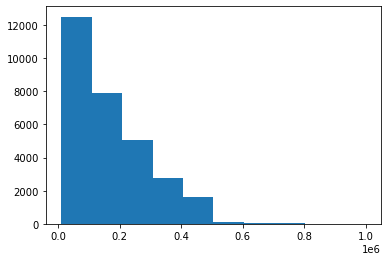

In [17]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

In [18]:
credit['SEX'].unique()

array(['female', 'male'], dtype=object)

In [19]:
#Label encoding sex column (female=0, male=1) (Default= 0, Not Default= 1)

le = LabelEncoder()
credit['SEX_coded']= le.fit_transform(credit['SEX'])
credit['Default_coded']= le.fit_transform(credit['default payment next month'])
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_coded,Default_coded
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,default,0,0
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,default,0,0
2,3.0,90000,female,university,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,not default,0,1
3,4.0,50000,female,university,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,not default,0,1
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,not default,1,1


In [20]:
#convert remaining non-numeric column to a series of binary numeric 'Dummy' columns
credit = pd.get_dummies(credit, columns=['EDUCATION'])
credit.sample(3)

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_coded,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
358,358.0,380000,male,2,34,0,0,0,0,0,...,6000,5000,4400,not default,1,1,0,0,0,1
22520,22520.0,500000,female,1,36,-2,-2,-2,-2,-2,...,8016,20514,16625,not default,0,1,1,0,0,0
2294,2294.0,360000,female,1,46,1,-1,2,2,-1,...,12140,42424,19825,not default,0,1,1,0,0,0


## Correlations

<AxesSubplot:>

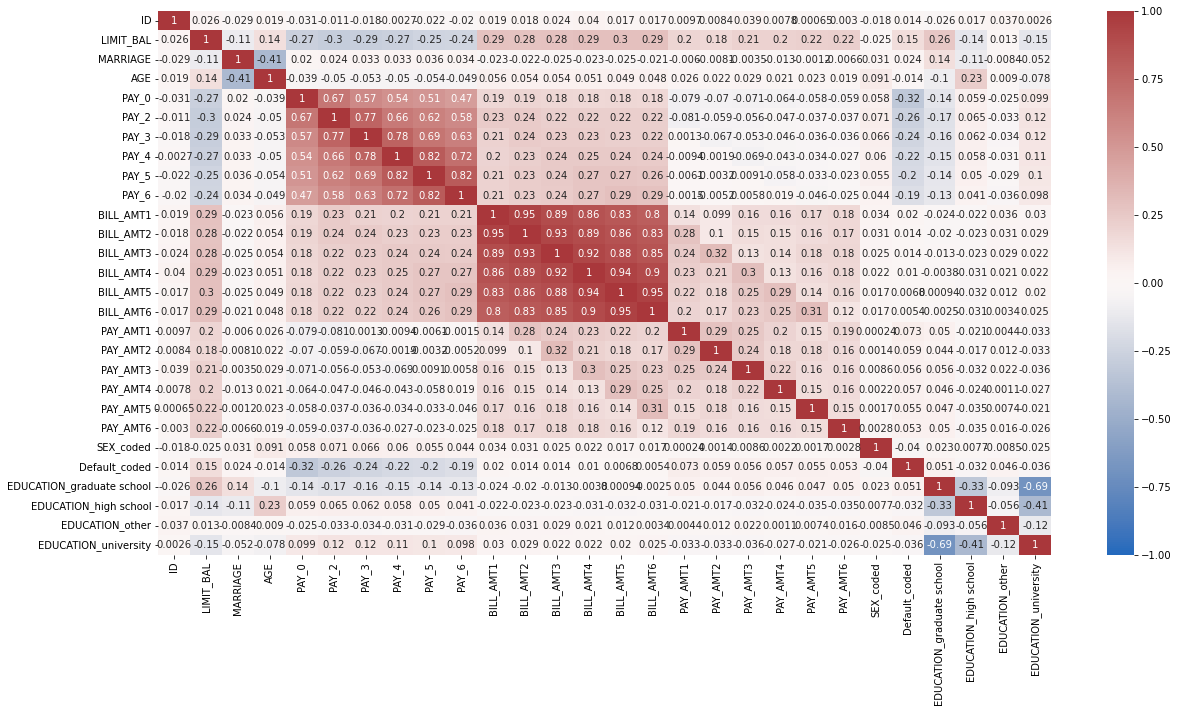

In [21]:
#Correlation heatmap
plt.figure(figsize = (20,10))
sn.heatmap(credit.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')

Seems there is strong colinearity between Bill amount variables and moderate one between pay status variables.

Limit Balance is correlated with some variables that is worth further study.

Default status is only correlated with pay history.

In [22]:
covMat = credit.cov()
print(covMat)

                                     ID     LIMIT_BAL     MARRIAGE  \
ID                         7.500250e+07  2.941664e+07  -131.452515   
LIMIT_BAL                  2.941664e+07  1.683446e+10 -7323.669658   
MARRIAGE                  -1.314525e+02 -7.323670e+03     0.272452   
AGE                        1.491057e+03  1.730767e+05    -1.992764   
PAY_0                     -2.975726e+02 -3.954593e+04     0.011683   
PAY_2                     -1.162770e+02 -4.603765e+04     0.015122   
PAY_3                     -1.916922e+02 -4.443225e+04     0.020421   
PAY_4                     -2.769132e+01 -4.057181e+04     0.020213   
PAY_5                     -2.178600e+02 -3.667056e+04     0.021074   
PAY_6                     -2.018774e+02 -3.509308e+04     0.020616   
BILL_AMT1                  1.236447e+07  2.727020e+09  -902.154685   
BILL_AMT2                  1.108392e+07  2.570130e+09  -802.517866   
BILL_AMT3                  1.462688e+07  2.548533e+09  -901.679085   
BILL_AMT4           

In [23]:
credit['Default_coded'].value_counts()

1    23364
0     6636
Name: Default_coded, dtype: int64

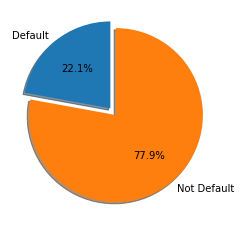

In [24]:
#Pie chart of Defaults
labels = 'Default', 'Not Default'
sizes = 6636, 23364
plt.pie(sizes, explode=(.1,0), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
#Default is about 22%

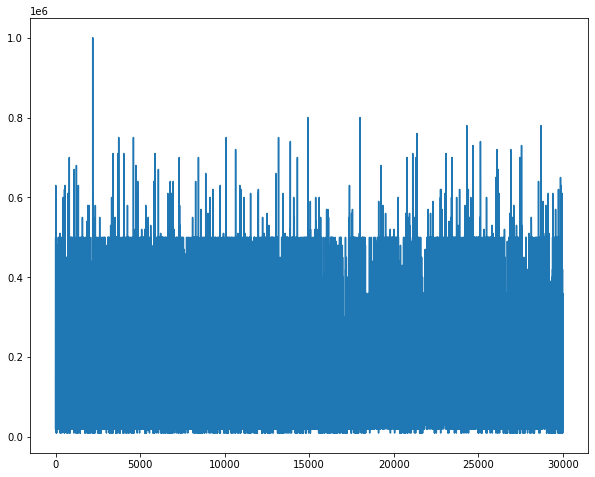

In [25]:
#Line Plots
plt.figure(figsize = (10,8))
plt.plot(credit['LIMIT_BAL'])

Text(0, 0.5, 'Pay 2')

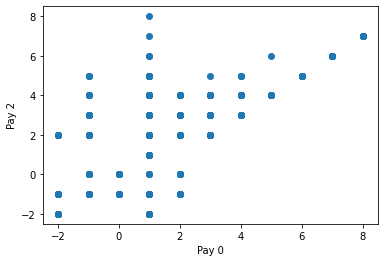

In [26]:
#Scatter Plots
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.xlabel('Pay 0')
plt.ylabel('Pay 2')

## Credit Limit & Payment history

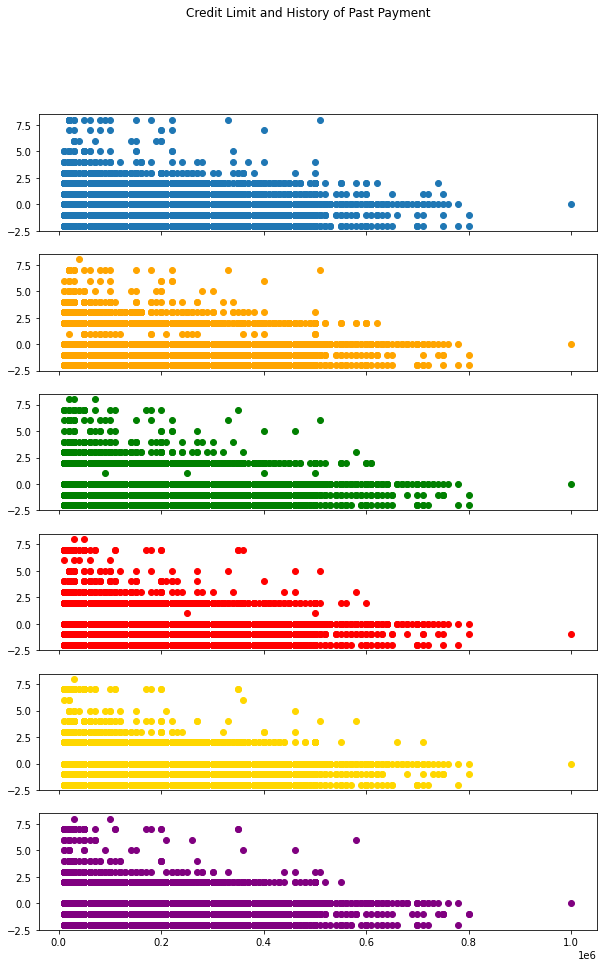

In [27]:
#Create a subplot with all payment history variables
fig, axs = plt.subplots(6, sharex=True, figsize=(10,15))
fig.suptitle('Credit Limit and History of Past Payment')
axs[0].scatter(credit['LIMIT_BAL'], credit['PAY_0'])
axs[1].scatter(credit['LIMIT_BAL'], credit['PAY_2'], color='orange')
axs[2].scatter(credit['LIMIT_BAL'], credit['PAY_3'], color='green')
axs[3].scatter(credit['LIMIT_BAL'], credit['PAY_4'], color='red')
axs[4].scatter(credit['LIMIT_BAL'], credit['PAY_5'], color='gold')
axs[5].scatter(credit['LIMIT_BAL'], credit['PAY_6'], color='purple')

Have very similar distributions, hence the collinearity.  Correlations are negative (The higher the credit limit, the more likely customers pay the balances).

## Credit Limit & Amount of bill statement

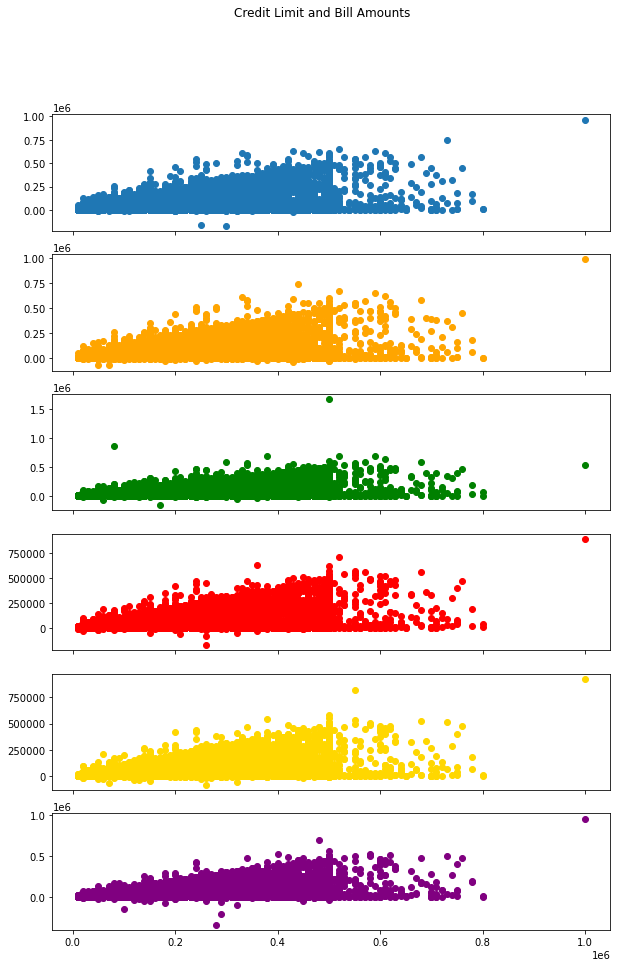

In [28]:
#Create a subplot with all bill amount variables
fig, axs = plt.subplots(6, sharex=True, figsize=(10,15))
fig.suptitle('Credit Limit and Bill Amounts')
axs[0].scatter(credit['LIMIT_BAL'], credit['BILL_AMT1'])
axs[1].scatter(credit['LIMIT_BAL'], credit['BILL_AMT2'], color='orange')
axs[2].scatter(credit['LIMIT_BAL'], credit['BILL_AMT3'], color='green')
axs[3].scatter(credit['LIMIT_BAL'], credit['BILL_AMT4'], color='red')
axs[4].scatter(credit['LIMIT_BAL'], credit['BILL_AMT5'], color='gold')
axs[5].scatter(credit['LIMIT_BAL'], credit['BILL_AMT6'], color='purple')

There seems to be a large outlier close to million dollars.

## Credit Limit & Payment Amount

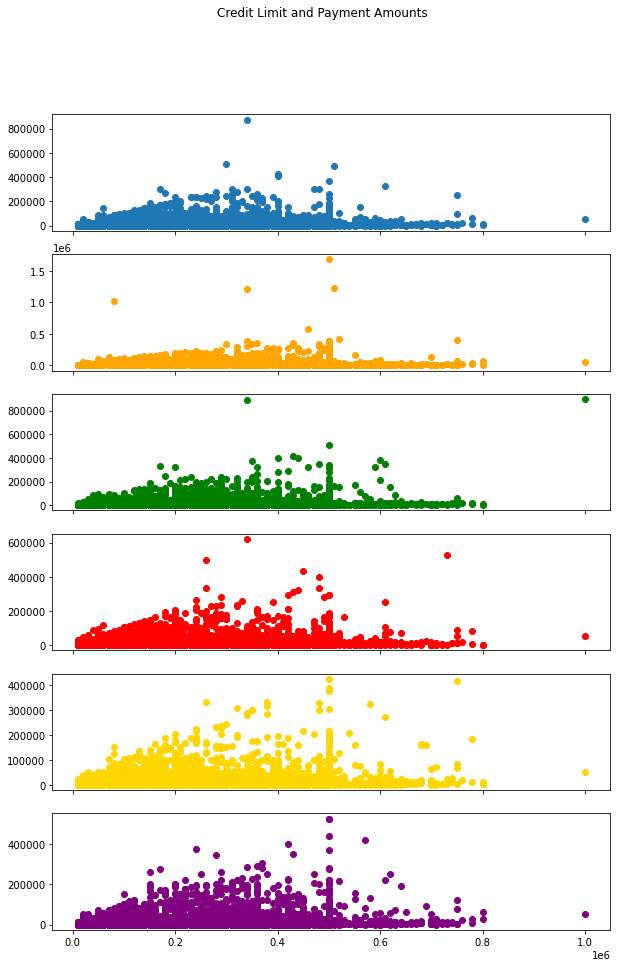

In [29]:
#Create a subplot with all bill amount variables
fig, axs = plt.subplots(6, sharex=True, figsize=(10,15))
fig.suptitle('Credit Limit and Payment Amounts')
axs[0].scatter(credit['LIMIT_BAL'], credit['PAY_AMT1'])
axs[1].scatter(credit['LIMIT_BAL'], credit['PAY_AMT2'], color='orange')
axs[2].scatter(credit['LIMIT_BAL'], credit['PAY_AMT3'], color='green')
axs[3].scatter(credit['LIMIT_BAL'], credit['PAY_AMT4'], color='red')
axs[4].scatter(credit['LIMIT_BAL'], credit['PAY_AMT5'], color='gold')
axs[5].scatter(credit['LIMIT_BAL'], credit['PAY_AMT6'], color='purple')

## Credit Limit & Default 

Text(0.5, 0, 'Credit Limit')

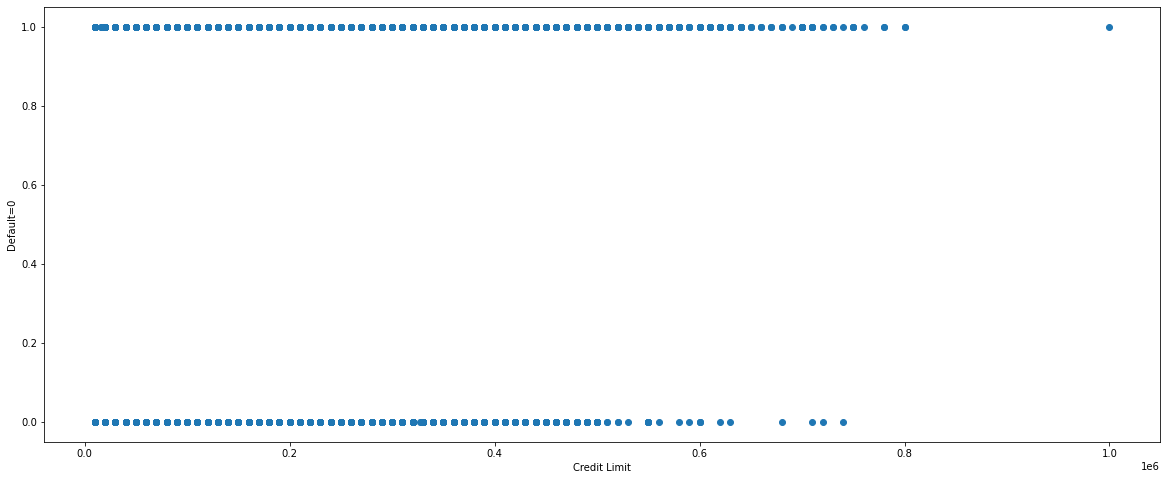

In [30]:
plt.figure(figsize = (20,8))
plt.scatter(credit['LIMIT_BAL'], credit['Default_coded'])
plt.ylabel('Default=0')
plt.xlabel('Credit Limit')

## Default & Sex 

In [31]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_coded', 'Default_coded',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')


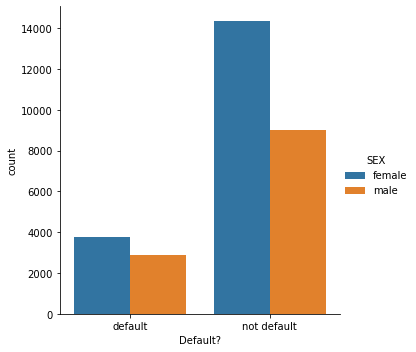

In [32]:
fg = sn.catplot(x='default payment next month', data=credit, hue='SEX', kind='count')
fg.set_xlabels('Default?')

## Age 

Text(0.5, 1.0, "Distribution of Customers' Ages")

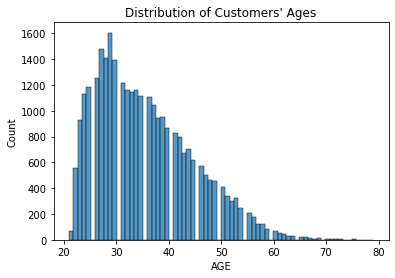

In [33]:
# Distribution of age  ***Age is skewed right, which means customers tend to be younger
age_dist = sn.histplot(credit['AGE'])
age_dist.set_title("Distribution of Customers' Ages")

Text(0.5, 0, 'Customer Age')

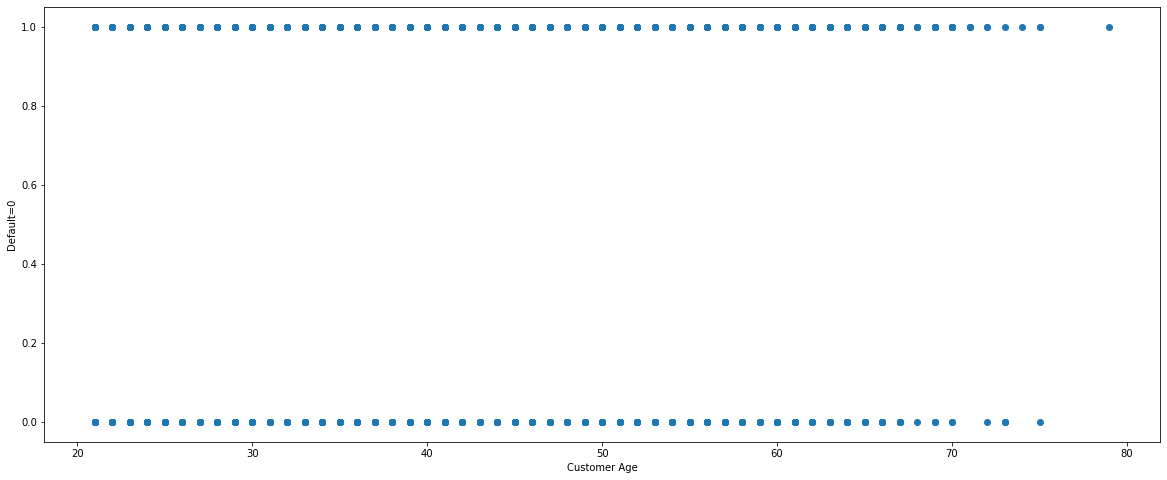

In [34]:
plt.figure(figsize = (20,8))
plt.scatter(credit['AGE'], credit['Default_coded'])
plt.ylabel('Default=0')
plt.xlabel('Customer Age')

# Marriage

Text(0, 0.5, '2-Single   1-Married    3-Divorce    0-Others')

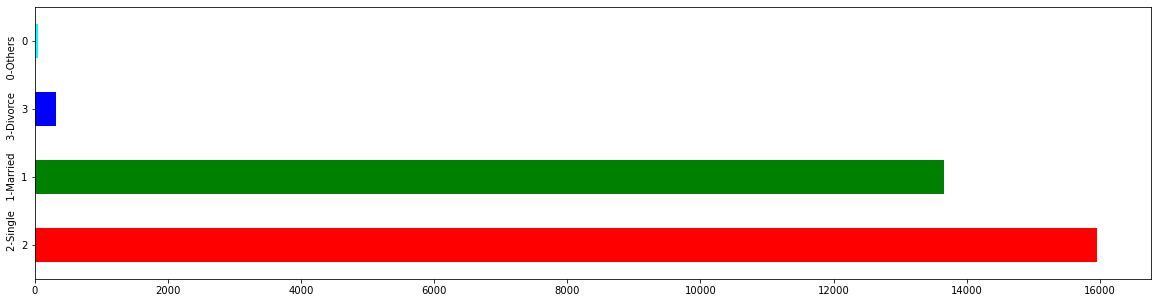

In [35]:
plt.figure(figsize = (20,5))
credit['MARRIAGE'].value_counts().plot.barh(color=['red', 'green', 'blue', 'cyan'])
plt.ylabel('2-Single   ''1-Married    ''3-Divorce    ''0-Others')

In [36]:
#Pivot table
table = pd.pivot_table(credit,index=['MARRIAGE','default payment next month'], values=["SEX_coded"], aggfunc=len, margins=True)
table

SEX_coded
MARRIAGE default payment next month           
0        default                             5
         not default                        49
1        default                          3206
         not default                     10453
2        default                          3341
         not default                     12623
3        default                            84
         not default                       239
All                                      30000

# Dealing with the Outliers

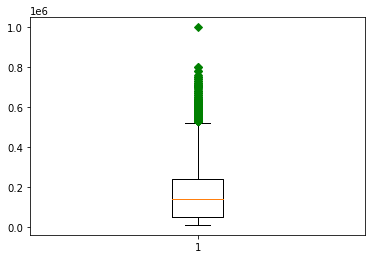

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [37]:
#visulalizing the outliers
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()
credit['LIMIT_BAL'].describe()

Larger amounts are the minority of the data but seem to have a significant effect on the data.

In [38]:
#Boundary values
print("Highest should be allowed",credit['LIMIT_BAL'].mean() + 3*credit['LIMIT_BAL'].std())
print("Lowest should be allowed",credit['LIMIT_BAL'].mean() - 3*credit['LIMIT_BAL'].std())

Highest should be allowed 556727.3073682518
Lowest should be allowed -221758.66203491847


In [39]:
#Finding the Outliers
upper_outliers = credit[(credit['LIMIT_BAL'] > 556727.31)] 
print(upper_outliers)

            ID  LIMIT_BAL     SEX  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
12        13.0     630000  female         2   41     -1      0     -1     -1   
434      434.0     580000  female         1   36      0      0      0      0   
452      452.0     600000    male         1   53      2      2      0      0   
528      528.0     620000  female         1   45      2      2      0      0   
556      556.0     630000  female         1   47      0      0      0     -1   
...        ...        ...     ...       ...  ...    ...    ...    ...    ...   
29572  29572.0     570000    male         2   33      0      0      0      0   
29741  29741.0     620000    male         2   31     -2     -2     -2     -2   
29862  29862.0     650000    male         1   44     -2     -2     -2     -2   
29887  29887.0     630000    male         1   46      0      0      0      0   
29964  29964.0     610000    male         2   31      0     -1      2     -1   

       PAY_5  ...  PAY_AMT4  PAY_AMT5  

In [40]:
lower_outliers = credit[(credit['LIMIT_BAL'] < -221758.66)]
print(lower_outliers)

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month, SEX_coded, Default_coded, EDUCATION_graduate school, EDUCATION_high school, EDUCATION_other, EDUCATION_university]
Index: []

[0 rows x 30 columns]


There are no low outliers, however there are 130 upper outliers!!!

In [41]:
#Locating the million-dollar outlier
credit.loc[credit['LIMIT_BAL'] > 900000]

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_coded,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
2198,2198.0,1000000,female,1,47,0,0,0,-1,0,...,50000,50000,50256,not default,0,1,1,0,0,0


In [42]:
credit.drop(2198,axis=0, inplace=True)

In [43]:
credit.iloc[2196:2199]

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_coded,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
2197,2197.0,10000,male,2,22,0,0,0,0,0,...,1000,1000,0,not default,1,1,0,1,0,0
2199,2199.0,150000,female,1,35,-1,-1,-1,-1,-1,...,4998,49398,4552,not default,0,1,0,1,0,0
2200,2200.0,20000,male,1,37,0,0,-1,-1,-2,...,0,17666,0,default,1,0,0,0,0,1


In [46]:
#Creating a new updated csv file
credit.to_csv('CreditOne_Data_updated.csv', index = False)